# RAxML on reads aligned to Quinoa and Beet references

This notebook makes a species-level phylogeny for 38 Amaranth samples. <br>
RAxmL uses concatenated sequence data and estimates 1 relationship for tree, with bootstraps. <br>
3RAD data assembles with ipyrad. minimal filtering (see below) <br>

To make sure there is no problem using an ingroup reference genome that we are aligning all reads to, I am also testing beet and quinoa as the reference.  In both cases, beet is the outgroup, and quinoa is not included in the tree at all. <br>

Nov 12, 2020

In [1]:
# import packages into python
import ipyrad as ip
#import ipyparallel as ipp
import ipyrad.analysis as ipa
import toytree
import toyplot.svg
import pandas as pd

# connect to parallel client
#ipyclient = ipp.Client()
#ip.cluster_info(ipyclient)

# print the version of ipyrad you are running
print('ipyrad', ipa.__version__)
print('toytree', toytree.__version__)

ipyrad 0.9.61
toytree 2.0.4


### Make a ML tree with consensus species 

Must use window extractor instead of treeslider to go into ipa.raxml 

In [2]:
#set output directory for both quinoa and beet
OUTDIR = "/rigel/dsi/users/slh2181/tuberculatus_plate/asplundii/hybridus_redo/Outgroup_reference/"

In [3]:
# the path to your HDF5 formatted seqs file
dataQ = "/rigel/dsi/users/slh2181/tuberculatus_plate/ipyrad/Quinoa_ref_all_samples_min2_outfiles/Quinoa_ref_all_samples_min2.seqs.hdf5"

In [4]:
# first load the data file with no other arguments to see scaffold table
test = ipa.window_extracter(dataQ)

#test.scaffold_table.head(20)
scaffolds_to_include = test.scaffold_table.sort_values(by='scaffold_length', ascending=False)#.index[:20].tolist()

In [5]:
scaffolds_to_include.head(30)

,scaffold_name,scaffold_length
0,NW_018742204.1,23816425
534,NW_018742738.1,14503688
1088,NW_018743292.1,13919302
2035,NW_018744239.1,12398513
2820,NW_018745024.1,12291897
1048,NW_018743252.1,11561360
3480,NW_018745684.1,11062796
1127,NW_018743331.1,10939605
3244,NW_018745448.1,10479801
2163,NW_018744367.1,10083965


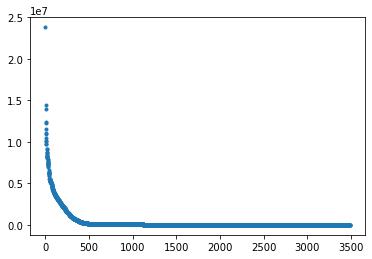

In [6]:
import matplotlib
abc = scaffolds_to_include.reset_index()
abc.scaffold_length.plot(marker='.', linestyle='None')

In [7]:
scaffolds_to_include

,scaffold_name,scaffold_length
0,NW_018742204.1,23816425
534,NW_018742738.1,14503688
1088,NW_018743292.1,13919302
2035,NW_018744239.1,12398513
2820,NW_018745024.1,12291897
...,...,...
2632,NW_018744836.1,8460
898,NW_018743102.1,7844
2034,NW_018744238.1,6773
2942,NW_018745146.1,5929


In [8]:
imap={"acanthochiton": ["acanthochiton_SLH_AL_0001","acanthochiton_SLH_AL_0002"],
      "acutilobus": ["acutilobus_SLH_AL_0003","acutilobus_SLH_AL_0004"],
      "albus": ["albus_SLH_AL_0006", "albus_SLH_AL_0009", "albus_SLH_AL_0010"],
      "arenicola": ["arenicola_SLH_AL_0013","arenicola_SLH_AL_0018","arenicola_SLH_AL_0012","arenicola_SLH_AL_0015"],
 #     "asplundii": [],
      "australis": ["australis_SLH_AL_0020","australis_SLH_AL_0021"],
      "blitoides": ["blitoides_SLH_AL_0028"], #"blitoides_SLH_AL_0023",
      "blitum": ["blitum-blitum_SLH_AL_0029", "blitum-oleraceus_SLH_AL_0034", "blitum-pseudogracilis_SLH_AL_0037"],
      "californicus": ["californicus_SLH_AL_0039"],
      "cannabinus": ["cannabinus_SLH_AL_0040", "cannabinus_SLH_AL_0041"], #"cannabinus_SLH_AL_0042"],
      "caudatus": ["caudatus_SLH_AL_0102","caudatus_SLH_AL_0110","caudatus_SLH_AL_0116","caudatus_SLH_AL_0322","caudatus_SLH_AL_0540"],
      "crassipes": ["crassipes_SLH_AL_0599","crassipes_SLH_AL_0600"],
      "cruentus": ["cruentus_SLH_AL_0679", "cruentus_SLH_AL_0699", "cruentus_SLH_AL_0728", "cruentus_SLH_AL_0804", "cruentus_SLH_AL_0832"],
      "hybridus2": ["hybridus_SLH_AL_1060", "hybridus_SLH_AL_1098"],
      "deflexus": ["deflexus_SLH_AL_0951","deflexus_SLH_AL_0952", "deflexus_SLH_AL_0955","deflexus_SLH_AL_0953","deflexus_SLH_AL_0954"],
      "dubius": ["dubius_SLH_AL_0965","dubius_SLH_AL_0979","dubius_SLH_AL_0992"],
      "fimbriatus": [ "fimbriatus_SLH_AL_0998"], #"fimbriatus_SLH_AL_0997",
      "floridanus": ["floridanus_SLH_AL_1000"],
      "graecizans": ["graecizans-aschersonianus_SLH_AL_1009", "graecizans-silvestris_SLH_AL_1013", "graecizans-thellungianus_SLH_AL_1014", 
                    "asplundii_SLH_AL_0019"],
      "greggii": ["greggii_SLH_AL_1015", "greggii_SLH_AL_1016"],
      "hybridus1": ["hybridus_SLH_AL_0001-restricted", "hybridus_SLH_AL_1117"],
      "hybridus3": ["hybridus_SLH_AL_1099"], 
      "hypochondriacus": ["hypochondriacus_SLH_AL_1178", "hypochondriacus_SLH_AL_1197", "hypochondriacus_SLH_AL_1264", "hypochondriacus_SLH_AL_1285","hypochondriacus_SLH_AL_2282", "hypochondriacus_SLH_AL_2436"],
      "muricatus": ["muricatus_SLH_AL_2634"],
      "palmeri": ["palmeri-aff_SLH_AL_0017", "palmeri_SLH_AL_2637", "palmeri_SLH_AL_2644", "palmeri_SLH_AL_2647", "palmeri_SLH_AL_2649", "palmeri_SLH_AL_2650",
                  "palmeri_SLH_AL_2635","palmeri_SLH_AL_2636","palmeri_SLH_AL_2638","palmeri_SLH_AL_2639","palmeri_SLH_AL_2640","palmeri_SLH_AL_2641","palmeri_SLH_AL_2642","palmeri_SLH_AL_2643","palmeri_SLH_AL_2645","palmeri_SLH_AL_2646",
                  "palmeri_SLH_AL_159-contemp","palmeri_SLH_AL_163-contemp","palmeri_SLH_AL_173-contemp","palmeri_SLH_AL_174-contemp","palmeri_SLH_AL_235-contemp"],
      "powellii": ["powellii-bouchonii_SLH_AL_2653", "powellii-powellii_SLH_AL_2663", "powellii-powellii_SLH_AL_2665"],
      "pumilus": ["pumilus_SLH_AL_5-restricted","pumilus_SLH_AL_7-restricted"],
      "quitensis": ["quitensis_SLH_AL_2671", "quitensis_SLH_AL_2675","quitensis_SLH_AL_2753"],
      "retroflexus": ["retroflexus_SLH_AL_2770", "retroflexus_SLH_AL_2773", "retroflexus_SLH_AL_2780"],
      "spinosus": ["spinosus_SLH_AL_2792", "spinosus_SLH_AL_2793", "spinosus_SLH_AL_2806", "spinosus_SLH_AL_2809", "spinosus_SLH_AL_2811"],
      "standleyanus": ["standleyanus_SLH_AL_2815","standleyanus_SLH_AL_2816"],
      "tamaulipensis": ["tamaulipensis_SLH_AL_2817"],
      "torreyi": ["torreyi_SLH_AL_2818"],
      "tricolor": ["tricolor_SLH_AL_2869", "tricolor_SLH_AL_2940", "tricolor_SLH_AL_2953", "tricolor_SLH_AL_2978"],
      "tuberculatus": ["tuberculatus_SLH_AL_0009-restricted", "tuberculatus_SLH_AL_3003", "tuberculatus_SLH_AL_3017", "tuberculatus_SLH_AL_3027", "tuberculatus_SLH_AL_3045",
                        "tuberculatus_SLH_AL_2999","tuberculatus_SLH_AL_3000","tuberculatus_SLH_AL_3001","tuberculatus_SLH_AL_3002","tuberculatus_SLH_AL_3004","tuberculatus_SLH_AL_3005",
                        "tuberculatus_SLH_AL_3006","tuberculatus_SLH_AL_3007","tuberculatus_SLH_AL_3008","tuberculatus_SLH_AL_3009","tuberculatus_SLH_AL_3010",
                        "tuberculatus_SLH_AL_3011","tuberculatus_SLH_AL_3012","tuberculatus_SLH_AL_3013","tuberculatus_SLH_AL_3014","tuberculatus_SLH_AL_3015",
                        "tuberculatus_SLH_AL_3016","tuberculatus_SLH_AL_3018","tuberculatus_SLH_AL_3019","tuberculatus_SLH_AL_3020","tuberculatus_SLH_AL_3021",
                        "tuberculatus_SLH_AL_3022","tuberculatus_SLH_AL_3023","tuberculatus_SLH_AL_3024","tuberculatus_SLH_AL_3025","tuberculatus_SLH_AL_3026",
                        "tuberculatus_SLH_AL_3028","tuberculatus_SLH_AL_3029","tuberculatus_SLH_AL_3030","tuberculatus_SLH_AL_3031","tuberculatus_SLH_AL_3032",
                        "tuberculatus_SLH_AL_3033","tuberculatus_SLH_AL_3034","tuberculatus_SLH_AL_3035","tuberculatus_SLH_AL_3036",#"tuberculatus_SLH_AL_3037",
                        "tuberculatus_SLH_AL_3038","tuberculatus_SLH_AL_3039","tuberculatus_SLH_AL_3041","tuberculatus_SLH_AL_3042","tuberculatus_SLH_AL_3043",
                        "tuberculatus_SLH_AL_3044","tuberculatus_SLH_AL_3046","tuberculatus_SLH_AL_154-contemp","tuberculatus_SLH_AL_155-contemp",
                        "tuberculatus_SLH_AL_156-contemp","tuberculatus_SLH_AL_157-contemp","tuberculatus_SLH_AL_160-contemp","tuberculatus_SLH_AL_165-contemp",
                        "tuberculatus_SLH_AL_169-contemp","tuberculatus_SLH_AL_175-contemp","tuberculatus_SLH_AL_176-contemp","tuberculatus_SLH_AL_202-contemp",
                        "tuberculatus_SLH_AL_206-contemp","tuberculatus_SLH_AL_208-contemp","tuberculatus_SLH_AL_236-contemp","tuberculatus_SLH_AL_237-contemp"],
        "tucsonensis": ["tucsonensis_SLH_AL_3068"],
        "viridis": ["viridis_SLH_AL_3047", "viridis_SLH_AL_3062"],
        "watsonii": ["watsonii_SLH_AL_3065"],
        "wrightii": ["wrightii_SLH_AL_3066", "wrightii_SLH_AL_3067"],    
      "beet":["beet"],
     }

In [9]:
# select a scaffold idx, start, and end positions
Quinoa_conred = ipa.window_extracter(
    data = dataQ,
    name="Quinoa_ref",
    workdir=OUTDIR,
    scaffold_idxs=range(3487),
    #start=0,
    #end=,
    mincov=4,
    rmincov=0,
    imap=imap,
    minmap= {i: 0.1 for i in imap}, #half of each key in imap dictionary,
    consensus_reduce=True
)

#write output to file
Quinoa_conred.run(force=True)
# show stats of the window
Quinoa_conred.stats

Wrote data to /rigel/dsi/users/slh2181/tuberculatus_plate/asplundii/hybridus_redo/Outgroup_reference/Quinoa_ref.phy


,scaffold,start,end,sites,snps,missing,samples
0,concatenated,0,542263,542263,20578,0.435,39


In [10]:
run_rax = ipa.raxml(#data="/moto/eaton/users/slh2181/tuberculatus_plate/Analysis/Consensus_tree2/scaffolds_from_window_extractor/Concat_Scaffold.phy",
         data=Quinoa_conred.outfile,
          T=24, N=100,
         workdir="/rigel/dsi/users/slh2181/tuberculatus_plate/asplundii/hybridus_redo/Outgroup_reference/",
         name="Quinoa_ref",
         )


# print the raxml command string for prosperity
run_rax.command

'/rigel/home/slh2181/miniconda3/bin/raxmlHPC-PTHREADS-AVX2 -f a -T 24 -m GTRGAMMA -n Quinoa_ref -w /rigel/dsi/users/slh2181/tuberculatus_plate/asplundii/hybridus_redo/Outgroup_reference -s /rigel/dsi/users/slh2181/tuberculatus_plate/asplundii/hybridus_redo/Outgroup_reference/Quinoa_ref.phy -p 54321 -N 100 -x 12345'

In [11]:
# run the command, (options: block until finishes; overwrite existing)
run_rax.run(block=True,force=True)

job Quinoa_ref finished successfully


In [12]:
color_dict = {
"quitensis": "orange",# 'quitensis',
"caudatus": "orange",# 'caudatus',
"hypochondriacus": "orange",# 'hypochondriacus',
"reference": "orange",
"hybridus1": "orange",# 'hybridus',
"hybridus2": "orange",# 'hybridus',
"hybridus3": "orange",# 'hybridus',
"cruentus": "orange",# 'cruentus',
"wrightii": "orange",# 'wrightii',
"retroflexus": "orange",# 'retroflexus',
"powellii": "orange",# 'powellii',
"acutilobus": "orange",# 'acutilobus',
"watsonii": "orange",# 'watsonii',
"palmeri": "orange",# 'palmeri',
"spinosus": "orange",# 'spinosus',
"dubius": "orange",# 'dubius',
"arenicola": "blue",# 'arenicola',
"greggii": "blue",# 'greggii',
"acanthochiton": "blue",# 'acanthochiton',
"pumilus": "blue",# 'pumilus',
"floridanus": "blue",# 'floridanus',
"tuberculatus": "blue",# 'tuberculatus',
"cannabinus": "blue",# 'cannabinus',
"australis": "blue",# 'australis',
"viridis": "red",# 'viridis',
"deflexus": "red",# 'deflexus',
"muricatus": "red",# 'muricatus',
"standleyanus": "red",# 'standleyanus',
"asplundii": "purple",# 'asplundii',
"graecizans": "purple",# 'graecizans',
"tricolor": "purple",# 'tricolor',
"blitum": "purple",# 'blitum',
"albus": "green",# 'albus',
"californicus": "green",# 'californicus',
"blitoides": "green",# 'blitoides',
"torreyi": "green",# 'torreyi',
"crassipes": "green",# 'crassipes',
"tamaulipensis": "green",# 'tamaulipensis',
"fimbriatus": "green",# 'fimbriatus',
"tucsonensis": "green",# 'tucsonensis',
"beet": "black",# 'beet'
"unknown": "black",
}

In [13]:
tre = toytree.tree(run_rax.trees.bipartitions)
#tre = toytree.tree("/rigel/dsi/users/slh2181/tuberculatus_plate/fimbriatus/Outgroup_reference/RAxML_bipartitions.Quinoa_ref")
rtre = tre.root("beet")#.collapse_nodes(min_support=50)

In [14]:
our_labels = rtre.get_tip_labels()
colors = [color_dict[sp] for sp in our_labels]

In [15]:
canvas, axes, mark=rtre.draw(tip_labels_align=True, node_labels="support", 
                          use_edge_lengths=False,                        
                          node_labels_style={"font-size": "15px"},
                        node_sizes=27,
                        node_style={
                                "fill": "white",
                                "stroke": "black",
                        },
                        tip_labels_colors=colors,
                        tip_labels_style={"font-size":"16px"},
                        width=600, height=800);

<svg class="toyplot-canvas-Canvas" height="800.0px" id="tadd1d16ff89f4e02a903081de381ec61" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 600.0 800.0" width="600.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 100 99 100 100 47 100 100 100 100 71 100 100 99 99 100 100 100 94 100 100 100 100 82 98 100 99 99 98 100 100 100 83 100 99 66 95 100 caudatus quitensis hybridus1 hypochondriacus hybridus3 hybridus2 cruentus wrightii retroflexus powellii acutilobus palmeri watsonii spinosus dubius viridis deflexus muricatus standleyanus graecizans tricolor blitum albus californicus blitoides torreyi tamaulipensis crassipes fimbriatus tucsonensis greggii arenicola acanthochiton pumilus floridanus tuberculatus australis cannabinus beet

In [16]:
toyplot.svg.render(canvas,"/rigel/dsi/users/slh2181/tuberculatus_plate/asplundii/hybridus_redo/Outgroup_reference/Quinoa_ref_rax12nov2020.svg")

In [17]:
#plot the consensus of the bootstraps
mtre1 = toytree.mtree(run_rax.trees.bootstrap)
ctre1 = mtre1.get_consensus_tree().root('beet')
#rtre = tre.root("beet")#.collapse_nodes(min_support=50)

#our_labels = ctre.get_tip_labels()
#colors = [color_dict[sp] for sp in our_labels]

canvas, axes, mark=ctre1.draw(tip_labels_align=True, node_labels="support", 
                          use_edge_lengths=False,                        
                          node_labels_style={"font-size": "15px"},
                        node_sizes=27,
                        node_style={
                                "fill": "white",
                                "stroke": "black",
                        },
                        #tip_labels_colors=colors,
                        tip_labels_style={"font-size":"16px"},
                        width=600, height=800);

<svg class="toyplot-canvas-Canvas" height="800.0px" id="t40b61680a7ae4333ae30703fae81f914" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 600.0 800.0" width="600.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 100 99 100 100 47 100 100 100 100 71 100 100 99 99 100 100 100 94 100 100 100 100 82 98 100 99 99 98 100 100 100 83 100 99 66 95 100 quitensis caudatus hybridus1 hypochondriacus hybridus3 cruentus hybridus2 retroflexus wrightii powellii acutilobus watsonii palmeri spinosus dubius deflexus viridis muricatus standleyanus tricolor graecizans blitum californicus albus blitoides torreyi crassipes tamaulipensis tucsonensis fimbriatus greggii arenicola acanthochiton pumilus tuberculatus floridanus australis cannabinus beet

## Repeat this with beet as reference

In [18]:
# the path to your HDF5 formatted seqs file
dataB = "/rigel/dsi/users/slh2181/tuberculatus_plate/ipyrad/Beet_ref_all_samples_outfiles/Beet_ref_all_samples.seqs.hdf5"
#use same Output directory as above

# first load the data file with no other arguments to see scaffold table
test = ipa.window_extracter(dataB)

#test.scaffold_table.head(20)
scaffolds_to_include = test.scaffold_table.sort_values(by='scaffold_length', ascending=False)#.index[:20].tolist()


#test.scaffold_table.sort_values(by='scaffold_length', ascending=False).index[:20]

In [19]:
scaffolds_to_include#.head(18)

,scaffold_name,scaffold_length
126,NC_025817.2,60962716
95,NC_025816.2,52461754
186,NC_025820.2,45274173
144,NC_025818.2,44152522
21,NC_025813.2,40393389
...,...,...
33842,NW_017601158.1,500
33845,NW_017601161.1,500
33846,NW_017601162.1,500
33264,NW_017600580.1,500


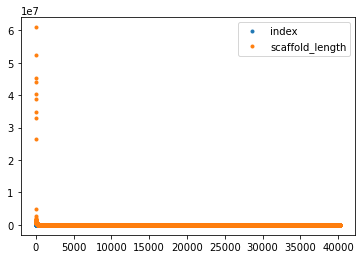

In [20]:
ab = scaffolds_to_include.reset_index()
ab.plot(marker='.', linestyle='None')

In [21]:
# select a scaffold idx, start, and end positions
Beet_conred = ipa.window_extracter(
    data = dataB,
    name="Beet_ref",
    workdir=OUTDIR,
    scaffold_idxs=range(40246),
    #start=0,
    #end=,
    mincov=4,
    rmincov=0,
    imap=imap,
    minmap= {i: 0.1 for i in imap}, #half of each key in imap dictionary,
    consensus_reduce=True
)

#write output to file
Beet_conred.run(force=True)
# show stats of the window
Beet_conred.stats

Wrote data to /rigel/dsi/users/slh2181/tuberculatus_plate/asplundii/hybridus_redo/Outgroup_reference/Beet_ref.phy


,scaffold,start,end,sites,snps,missing,samples
0,concatenated,0,443431,443431,17940,0.414,39


In [22]:
run_rax2 = ipa.raxml(#data="/rigel/dsi/users/slh2181/tuberculatus_plate/Outgroup_reference/Beet_all_scaffold_min4.phy",
         data=Beet_conred.outfile,
          T=24, N=100,
         workdir="/rigel/dsi/users/slh2181/tuberculatus_plate/asplundii/hybridus_redo/Outgroup_reference/",
         name="Beet_ref",
         )


# print the raxml command string for prosperity
run_rax2.command

'/rigel/home/slh2181/miniconda3/bin/raxmlHPC-PTHREADS-AVX2 -f a -T 24 -m GTRGAMMA -n Beet_ref -w /rigel/dsi/users/slh2181/tuberculatus_plate/asplundii/hybridus_redo/Outgroup_reference -s /rigel/dsi/users/slh2181/tuberculatus_plate/asplundii/hybridus_redo/Outgroup_reference/Beet_ref.phy -p 54321 -N 100 -x 12345'

In [23]:
run_rax2.run(block=True,force=True)

job Beet_ref finished successfully


In [24]:
tre = toytree.tree(run_rax2.trees.bipartitions)
#tre = toytree.tree("/rigel/dsi/users/slh2181/tuberculatus_plate/Outgroup_reference/Analysis/Consensus_tree/RAxML/RAxML_bipartitions.Beet_ref")
rtre = tre.root("beet")#.collapse_nodes(min_support=50)

our_labels = rtre.get_tip_labels()
colors = [color_dict[sp] for sp in our_labels]

canvas, axes, mark=rtre.draw(tip_labels_align=True, node_labels="support", 
                          use_edge_lengths=False,                        
                          node_labels_style={"font-size": "15px"},
                        node_sizes=27,
                        node_style={
                                "fill": "white",
                                "stroke": "black",
                        },
                        tip_labels_colors=colors,
                        tip_labels_style={"font-size":"16px"},
                        width=600, height=800);

<svg class="toyplot-canvas-Canvas" height="800.0px" id="t1d408c6693e54f55803748d01915ca90" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 600.0 800.0" width="600.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 100 100 69 100 75 100 100 79 100 100 84 100 100 100 98 100 100 100 100 100 99 100 100 100 93 100 100 100 100 100 100 85 65 100 32 99 100 quitensis caudatus hybridus1 hypochondriacus hybridus3 hybridus2 cruentus retroflexus wrightii powellii acutilobus dubius palmeri watsonii spinosus pumilus acanthochiton greggii arenicola tuberculatus floridanus cannabinus australis viridis deflexus muricatus standleyanus graecizans tricolor blitum californicus albus blitoides torreyi crassipes tamaulipensis tucsonensis fimbriatus beet

In [25]:
toyplot.svg.render(canvas,"/rigel/dsi/users/slh2181/tuberculatus_plate/asplundii/hybridus_redo/Outgroup_reference/Beet_ref_rax12nov2020.svg")

In [26]:
#plot the consensus of the bootstraps
mtre = toytree.mtree(run_rax2.trees.bootstrap)
ctre = mtre.get_consensus_tree().root('beet')
#rtre = tre.root("beet")#.collapse_nodes(min_support=50)

#our_labels = ctre.get_tip_labels()
#colors = [color_dict[sp] for sp in our_labels]

canvas, axes, mark=ctre.draw(tip_labels_align=True, node_labels="support", 
                          use_edge_lengths=False,                        
                          node_labels_style={"font-size": "15px"},
                        node_sizes=27,
                        node_style={
                                "fill": "white",
                                "stroke": "black",
                        },
                        #tip_labels_colors=colors,
                        tip_labels_style={"font-size":"16px"},
                        width=600, height=800);

<svg class="toyplot-canvas-Canvas" height="800.0px" id="t37ff3b2683574cb4a70b90ad1c8dad64" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 600.0 800.0" width="600.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 100 96 100 57 99 100 95 58 100 100 100 100 90 100 100 100 100 100 100 100 68 100 100 100 100 100 100 100 100 100 74 69 100 44 95 100 quitensis caudatus hybridus hypochondriacus cruentus wrightii retroflexus powellii acutilobus palmeri watsonii spinosus dubius pumilus acanthochiton greggii arenicola tuberculatus floridanus australis cannabinus graecizans asplundii tricolor blitum viridis deflexus muricatus standleyanus albus californicus blitoides torreyi crassipes tamaulipensis tucsonensis fimbriatus beet

In [27]:
c, a, m = mtre.draw_cloud_tree(fixed_order=ctre.get_tip_labels(),
                            width=600, height=800, edge_style={"stroke-opacity": 0.1})

<svg class="toyplot-canvas-Canvas" height="800.0px" id="t1b683131976849078d352857311f9f46" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 600.0 800.0" width="600.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> viridis deflexus muricatus standleyanus graecizans asplundii tricolor blitum albus californicus blitoides torreyi tamaulipensis crassipes tucsonensis fimbriatus quitensis caudatus hybridus hypochondriacus cruentus retroflexus wrightii powellii acutilobus watsonii palmeri spinosus dubius beet australis cannabinus tuberculatus floridanus arenicola greggii acanthochiton pumilus <path d="M 317.2 564.4 L 346.9 573.5" id="

## Is this distribution of scaffold sizes similar to assembled Amaranth genome? 

In [45]:
# the path to your HDF5 formatted seqs file
dataA = "/moto/eaton/users/slh2181/tuberculatus_plate/ipyrad/no_max_SNPs_outfiles/no_max_SNPs.seqs.hdf5"

# first load the data file with no other arguments to see scaffold table
test = ipa.window_extracter(dataA)

#test.scaffold_table.head(20)
scaffolds_to_include = test.scaffold_table.sort_values(by='scaffold_length', ascending=False)#.index[:20].tolist()


#test.scaffold_table.sort_values(by='scaffold_length', ascending=False).index[:20]

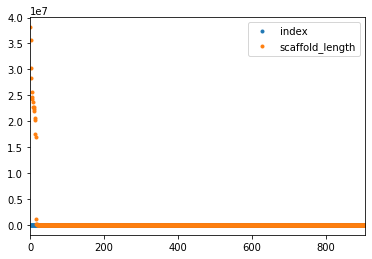

In [28]:
ab = scaffolds_to_include.reset_index()
ab.plot(marker='.', linestyle='None')